# Exercise #

In this exercise, you'll build a model to predict hotel cancellations with a binary classifier.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

First, load the *Hotel Cancellations* dataset. (**fix the path** if necessary)

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


hotel = pd.read_csv('data/hotel_train.csv')
hotel["babies"]

0        0
1        0
2        0
3        0
4        0
        ..
95507    0
95508    0
95509    0
95510    0
95511    0
Name: babies, Length: 95512, dtype: int64

In [3]:
''' per vedere quante sono le prenotazioni cancellate e quante no, per farsi un idea di quanto
sono sbilanciate'''
hotel.is_canceled.value_counts() 
# per vedere la distribuzione dei valori nelle varie colonne
numerical = hotel.loc[:, (hotel.dtypes == int) | (hotel.dtypes == float)].columns.to_list()
display(numerical)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [4]:
categorical = hotel.loc[:, (hotel.dtypes != int) & (hotel.dtypes != float)].columns.tolist()
display(categorical)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [5]:
''' per ogni colonna descrivo dati come il numero di istanze, media, media, varianza etc
per identificare anche eventuali anomalie'''
for col in numerical:
    display(hotel[col].describe())
    print("")

count    95512.000000
mean         0.370414
std          0.482918
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

count    95512.000000
mean       103.640422
std        106.621465
min          0.000000
25%         18.000000
50%         69.000000
75%        160.000000
max        737.000000
Name: lead_time, dtype: float64

count    95512.000000
mean      2016.154975
std          0.707984
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

count    95512.000000
mean        27.191484
std         13.616434
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

count    95512.000000
mean        15.792476
std          8.777453
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

count    95512.000000
mean         0.928407
std          0.999295
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

count    95512.000000
mean         2.496252
std          1.909701
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

count    95512.000000
mean         1.857170
std          0.583883
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

count    95508.000000
mean         0.104442
std          0.399241
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

count    95512.000000
mean         0.008167
std          0.100236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64

count    95512.000000
mean         0.032059
std          0.176157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64

count    95512.000000
mean         0.086418
std          0.847261
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

count    95512.000000
mean         0.137082
std          1.493931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64

count    95512.000000
mean         0.221522
std          0.653579
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64

count    82410.000000
mean        86.712596
std        110.768698
min          1.000000
25%          9.000000
50%         14.000000
75%        229.000000
max        535.000000
Name: agent, dtype: float64

count    5407.000000
mean      188.024783
std       132.044367
min         8.000000
25%        62.000000
50%       174.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

count    95512.000000
mean         2.337581
std         17.808556
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

count    95512.000000
mean       101.870091
std         48.204319
min         -6.380000
25%         69.367500
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

count    95512.000000
mean         0.062359
std          0.244048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

count    95512.000000
mean         0.571593
std          0.792963
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Eventualmente posso fare *feature engineering* per cercare di combinare feature 
per crearne un'altra piú significativa ad esempio in questo caso combinare
date e lead_time per creare una nuova feature che indica il numero di giorni di permanenza eliminando
giorni feriali e giorni festivi, oppure aggregare la colonna children e babies in una colonna sola
o magari cambiare il conteggio delle prenotazioni cancellate in un indicatore binario

In [6]:
plt.tight_layout() # per graficare i dati
plt.show()
hotel.head()

<Figure size 640x480 with 0 Axes>

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,122,2016,December,50,8,0,3,2,...,A,1,No Deposit,83.0,NaN,0,Transient-Party,68.00,0,0
1,City Hotel,1,208,2016,July,31,30,2,2,2,...,A,0,No Deposit,9.0,NaN,0,Transient,80.75,0,0
2,City Hotel,0,212,2016,September,40,26,1,3,2,...,A,1,No Deposit,9.0,NaN,0,Transient-Party,129.65,0,1
3,Resort Hotel,1,120,2016,May,20,14,2,5,2,...,D,0,No Deposit,240.0,NaN,0,Transient,73.00,0,3
4,Resort Hotel,0,40,2017,January,3,16,1,2,1,...,A,0,No Deposit,NaN,NaN,0,Transient-Party,55.00,0,0


In [7]:
X = hotel.copy()
y = X.pop('is_canceled') # this is the target column
# enumerate months
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

# preparo la pipeline per trasformare feature numeriche
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values, default fill with 0
    StandardScaler(), #Standardizzare le feature
)

# preparo la pipeline per trasformare feature categoriche
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"), # fill missing values with NA
    OneHotEncoder(handle_unknown='ignore'), # codificare i valori categorici con enum
)

# Metto insieme le pipeline 
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75)
''' dato che le classi sono un po sbilanciate potrei usare stratify per bilanciarle che potrei anche
non fare se uso cross validation'''
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

# butto i dati nella pipeline e li trasformo
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X=preprocessor.fit_transform(X)

#Oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Set up cross-validation
n_splits = 10  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X_train.shape

(90166, 63)

In [8]:
''' Oppure verificare se esiste correlazione lineare tra le feature'''
'''import seaborn as sns
heatmap = sns.heatmap(hotel.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
display(heatmap)'''

"import seaborn as sns\nheatmap = sns.heatmap(hotel.corr(), vmin=-1, vmax=1, annot=True)\nheatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)\ndisplay(heatmap)"

<h1>Soluzione RussoRusso<h1>

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns

model = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report 0 is not canceled, 1 is canceled
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# Print confusion matrix
labels=np.unique(y_valid)
cm=confusion_matrix(y_valid, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix:')

# Create a heatmap with labels
'''plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()'''

# Print true positives and true negatives
print(f'True Positives (is canceled): {tp}')
print(f'True Negatives (is not canceled): {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     15050
           1       0.70      0.72      0.71      8828

    accuracy                           0.78     23878
   macro avg       0.77      0.77      0.77     23878
weighted avg       0.79      0.78      0.79     23878

Confusion Matrix:
True Positives (is canceled): 6378
True Negatives (is not canceled): 12357
False Positives: 2693
False Negatives: 2450
[[12357  2693]
 [ 2450  6378]]


<h1>Logistic Regression<h1>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns

model = LogisticRegression(solver="liblinear", random_state=0)
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the average performance across all folds
average_score = np.mean(cv_scores)
print("Average Accuracy:", average_score)

'''model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report 0 is not canceled, 1 is canceled
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# Print confusion matrix
labels=np.unique(y_valid)
cm=confusion_matrix(y_valid, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix:')

# Create a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print true positives and true negatives
print(f'True Positives (is canceled): {tp}')
print(f'True Negatives (is not canceled): {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))'''

Cross-validation Scores: [0.80873116 0.81082496 0.80358078 0.81049105 0.80682651 0.80755942
 0.8061983  0.81090985 0.80525599 0.80892053]
Average Accuracy: 0.8079298549249933


"model.fit(X_train, y_train)\ny_pred = model.predict(X_valid)\n\naccuracy = accuracy_score(y_valid, y_pred)\nprint(f'Accuracy: {accuracy:.2f}')\n\n# Print classification report 0 is not canceled, 1 is canceled\nprint('Classification Report:')\nprint(classification_report(y_valid, y_pred))\n\n# Print confusion matrix\nlabels=np.unique(y_valid)\ncm=confusion_matrix(y_valid, y_pred, labels=labels)\ntn, fp, fn, tp = cm.ravel()\nprint('Confusion Matrix:')\n\n# Create a heatmap with labels\nplt.figure(figsize=(8, 6))\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)\nplt.title('Confusion Matrix')\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.show()\n\n# Print true positives and true negatives\nprint(f'True Positives (is canceled): {tp}')\nprint(f'True Negatives (is not canceled): {tn}')\nprint(f'False Positives: {fp}')\nprint(f'False Negatives: {fn}')\nprint(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))"

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns

model = RandomForestClassifier(criterion="entropy", random_state=0)
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the average performance across all folds
average_score = np.mean(cv_scores)
print("Average Accuracy:", average_score)

'''model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report 0 is not canceled, 1 is canceled
print('Classification Report:')
print(classification_report(y_valid, y_pred))

# Print confusion matrix
labels=np.unique(y_valid)
cm=confusion_matrix(y_valid, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()
print('Confusion Matrix:')

# Create a heatmap with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print true positives and true negatives
print(f'True Positives (is canceled): {tp}')
print(f'True Negatives (is not canceled): {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))'''

Cross-validation Scores: [0.8569933  0.86065745 0.85289498 0.85886295 0.8642027  0.85792064
 0.86179458 0.85635012 0.85572191 0.86148047]
Average Accuracy: 0.858687910682088


"model.fit(X_train, y_train)\ny_pred = model.predict(X_valid)\naccuracy = accuracy_score(y_valid, y_pred)\nprint(f'Accuracy: {accuracy:.2f}')\n\n# Print classification report 0 is not canceled, 1 is canceled\nprint('Classification Report:')\nprint(classification_report(y_valid, y_pred))\n\n# Print confusion matrix\nlabels=np.unique(y_valid)\ncm=confusion_matrix(y_valid, y_pred, labels=labels)\ntn, fp, fn, tp = cm.ravel()\nprint('Confusion Matrix:')\n\n# Create a heatmap with labels\nplt.figure(figsize=(8, 6))\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)\nplt.title('Confusion Matrix')\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.show()\n\n# Print true positives and true negatives\nprint(f'True Positives (is canceled): {tp}')\nprint(f'True Negatives (is not canceled): {tn}')\nprint(f'False Positives: {fp}')\nprint(f'False Negatives: {fn}')\nprint(confusion_matrix(y_valid, y_pred, labels=np.unique(y_valid)))"

<h1>Rete Neurale<h1>

2023-11-17 23:02:06.996524: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 23:02:06.998761: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 23:02:07.020791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 23:02:07.020826: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 23:02:07.020858: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Min Validation Loss: 0.1062
Max Validation Accuracy: 0.8200
Min Validation Loss: 0.1005
Max Validation Accuracy: 0.8295
Min Validation Loss: 0.1070
Max Validation Accuracy: 0.8137
Min Validation Loss: 0.1049
Max Validation Accuracy: 0.8215
Min Validation Loss: 0.1052
Max Validation Accuracy: 0.8214
Min Validation Loss: 0.1051
Max Validation Accuracy: 0.8204
Min Validation Loss: 0.1044
Max Validation Accuracy: 0.8218
Min Validation Loss: 0.1055
Max Validation Accuracy: 0.8188
Min Validation Loss: 0.1059
Max Validation Accuracy: 0.8177
Min Validation Loss: 0.1012
Max Validation Accuracy: 0.8261
Average Validation Loss: 0.10518714115023613
Average Validation Accuracy: 0.8184834837913513


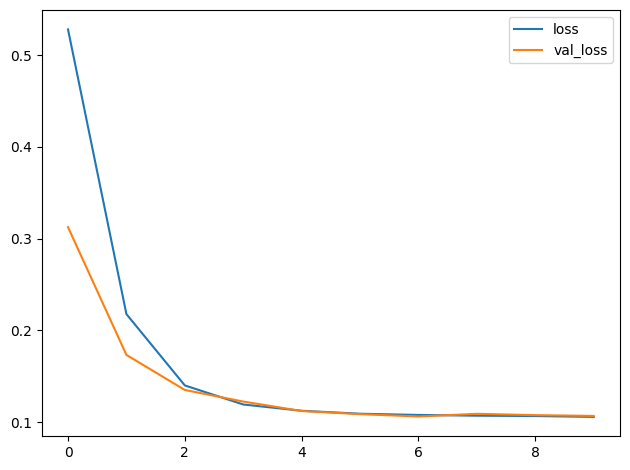

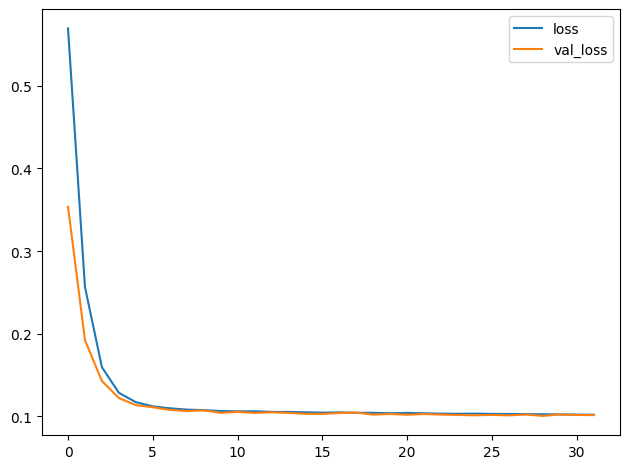

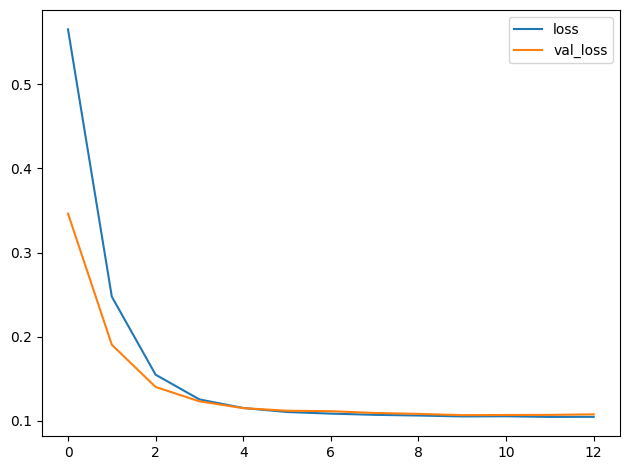

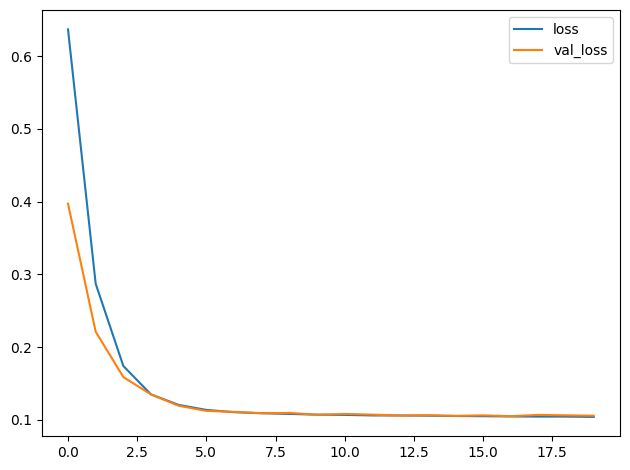

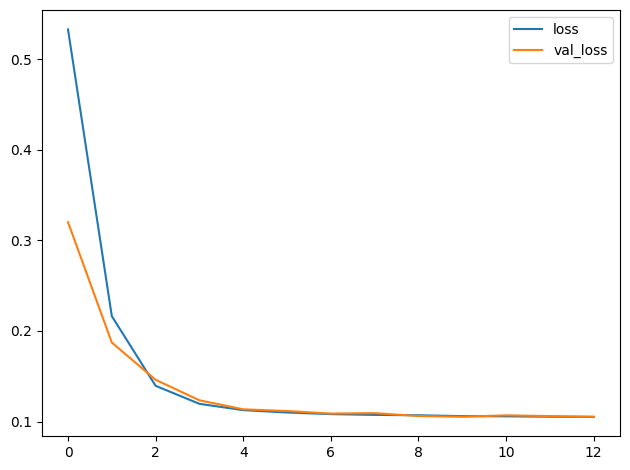

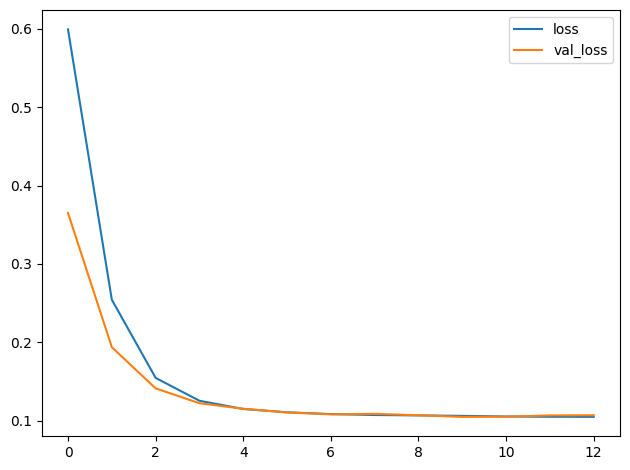

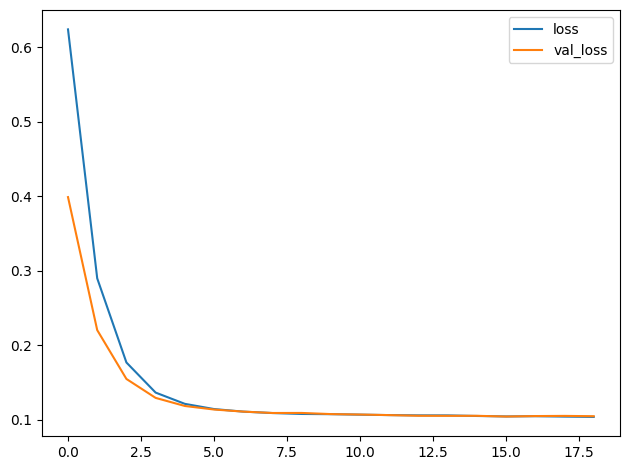

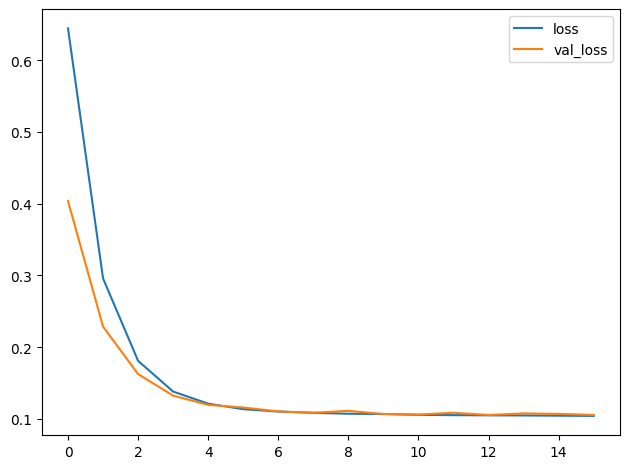

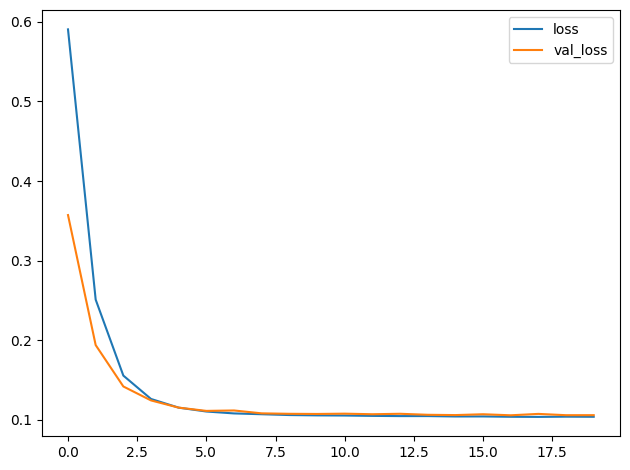

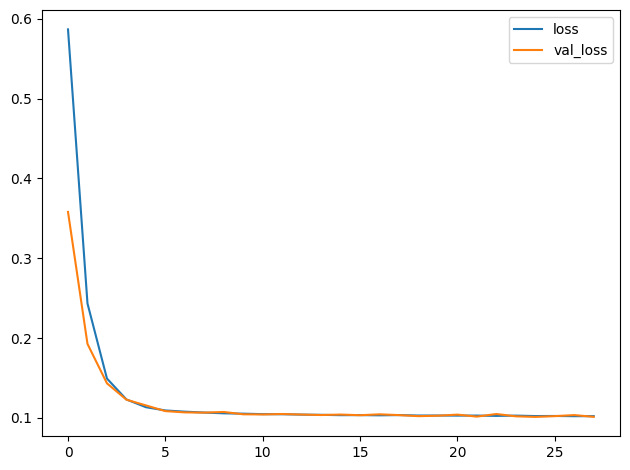

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
all_scores = []
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
input_shape = [X_train.shape[1]]
for train_index, valid_index in skf.split(X, y):
    # Split the data
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model = keras.Sequential(
        [
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu", input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.01)),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            layers.BatchNormalization(),
            layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer='adam',
        #loss='binary_crossentropy',
        loss='binary_focal_crossentropy',
        #loss='mean_squared_error',
        #loss='huber',
        metrics=['accuracy'],
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=512,
        epochs=100,
        verbose=0,
        callbacks=[callback], 
    )
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    print("Min Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
    print("Max Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))
    # Evaluate the model on the test set
    scores = model.evaluate(X_valid, y_valid, verbose=0)

    # Store the evaluation scores
    all_scores.append(scores)

# Print the average performance across all folds
average_scores = np.mean(all_scores, axis=0)
print("Average Validation Loss:", average_scores[0])
print("Average Validation Accuracy:", average_scores[1])

Min Validation Loss: 0.1034
Max Validation Accuracy: 0.8231
Min Validation Loss: 0.1028
Max Validation Accuracy: 0.8272
Min Validation Loss: 0.1058
Max Validation Accuracy: 0.8186
Min Validation Loss: 0.1039
Max Validation Accuracy: 0.8233
Min Validation Loss: 0.1028
Max Validation Accuracy: 0.8281
Min Validation Loss: 0.1033
Max Validation Accuracy: 0.8236
Min Validation Loss: 0.1045
Max Validation Accuracy: 0.8209
Min Validation Loss: 0.1051
Max Validation Accuracy: 0.8223
Min Validation Loss: 0.1043
Max Validation Accuracy: 0.8219
Min Validation Loss: 0.1048
Max Validation Accuracy: 0.8201
Average Loss: 0.10054950788617134
Average Accuracy: 0.8280424892902374


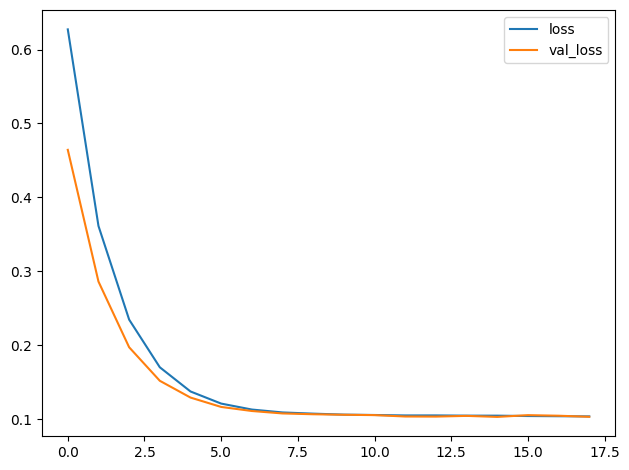

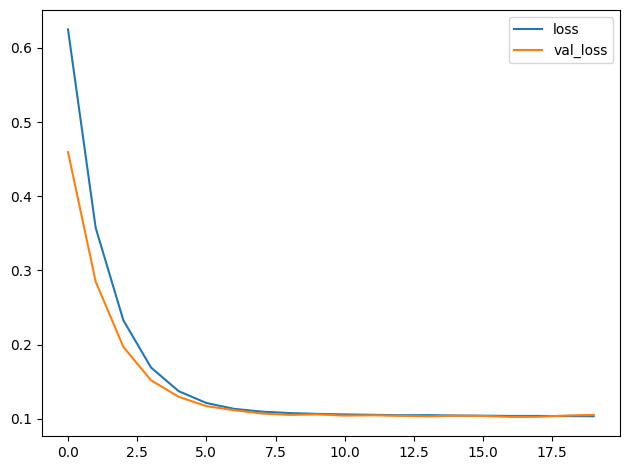

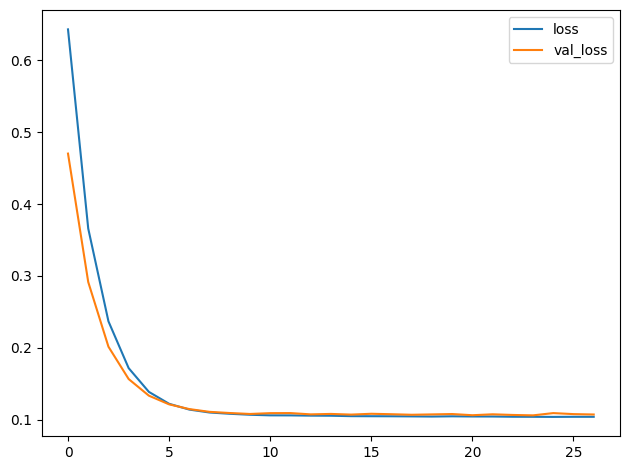

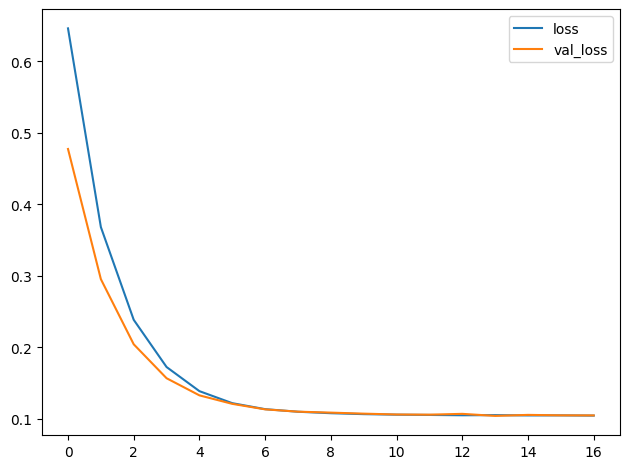

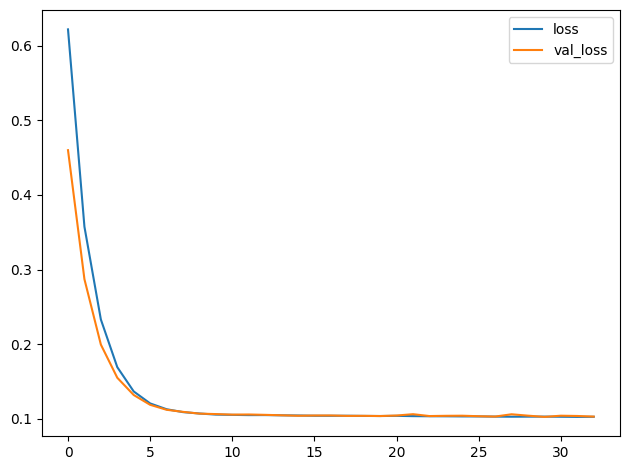

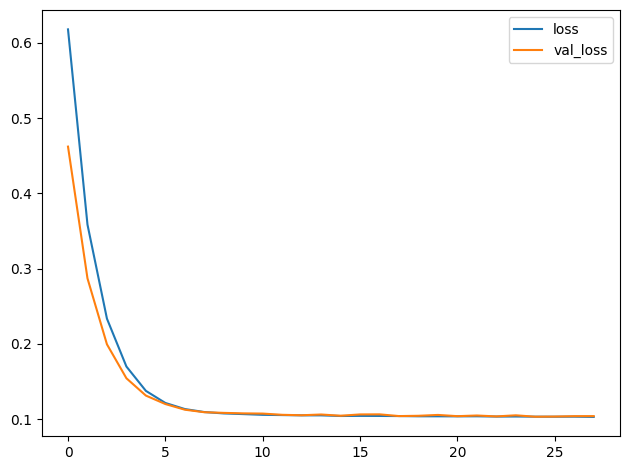

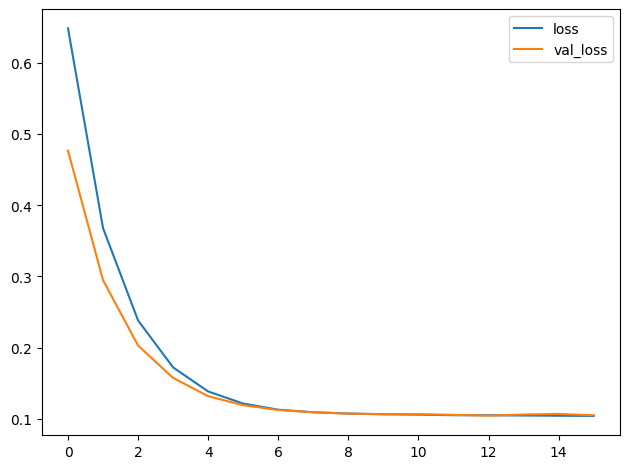

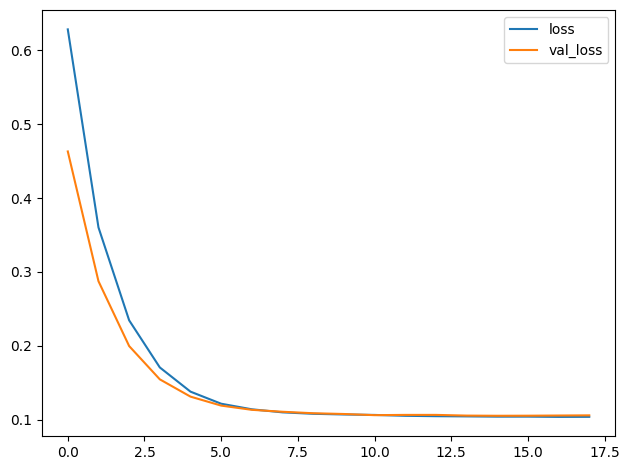

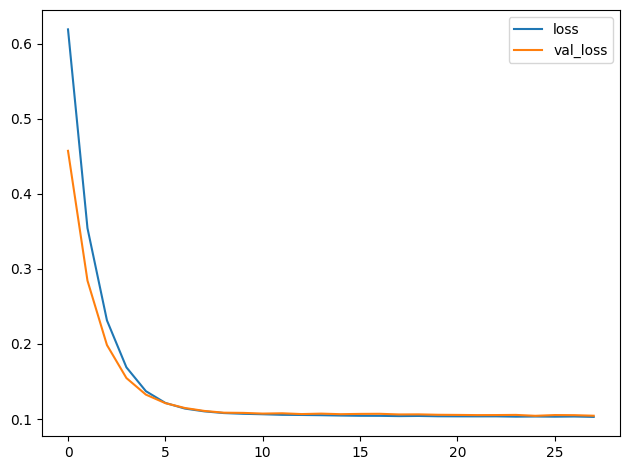

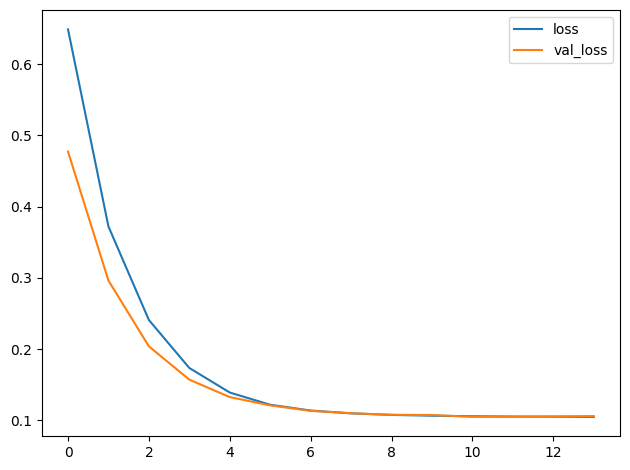

In [13]:
all_scores = []
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
input_shape = [X_train.shape[1]]
for train_index, valid_index in skf.split(X, y):
    # Split the data
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model2 = keras.Sequential(
        [
            layers.BatchNormalization(),
            #layers.Dropout(0.3),
            layers.Dense(32, activation="relu", input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.01)),
            layers.BatchNormalization(),
            #layers.Dropout(0.3),
            layers.Dense(16, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)),
            layers.BatchNormalization(),
            layers.Dense(1, activation="sigmoid"),
        ]
    )
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model2.compile(
        optimizer=sgd_optimizer,
        #loss='binary_crossentropy',
        loss='binary_focal_crossentropy',
        #loss='mean_squared_error',
        #loss='huber',
        metrics=['accuracy'],
    )

    history = model2.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=512,
        epochs=100,
        verbose=0,
        callbacks=[callback], 
    )
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    print("Min Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
    print("Max Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))
    scores = model.evaluate(X_valid, y_valid, verbose=0)

    # Store the evaluation scores
    all_scores.append(scores)

# Print the average performance across all folds
average_scores = np.mean(all_scores, axis=0)
print("Average Validation Loss:", average_scores[0])
print("Average Validation Accuracy:", average_scores[1])